In [ ]:
%load_ext rpy2.ipython

## TextMining for Service Resolution Description

###  Before The Pandemic

In [ ]:
%%R
install.packages(c('tm', 'wordcloud', 'plyr', 'tidyverse', 'knitr', 'tidytext', 'SnowballC'))
library(tm)
library(wordcloud)
library(plyr) 
library(tidyverse)
library(knitr)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘NLP’, ‘slam’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/NLP_0.2-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 144368 bytes (140 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [ ]:
%%R
dataset <- read.csv('drive/My Drive/nocovid311.csv')

In [ ]:
%%R
dataset_filt <- subset(dataset, Complaint.Type %in% count(dataset, Complaint.Type, sort=T)[1:50,]$Complaint.Type)
sr_resolution <- dataset_filt$Resolution.Description

In [ ]:
%%R
sr_resolution_cln <- sr_resolution %>% iconv("latin1", "ASCII")
control <- list(stopwords=TRUE, removePunctuation=TRUE, removeNumbers=TRUE, minDocFreq = 5)

In [ ]:
%%R
corpus <- VCorpus(VectorSource(sr_resolution_cln))
tdm <- TermDocumentMatrix(corpus, control)
tdm

<<TermDocumentMatrix (terms: 1005, documents: 2055473)>>
Non-/sparse entries: 21541552/2044208813
Sparsity           : 99%
Maximal term length: 45
Weighting          : term frequency (tf)


In [ ]:
%%R
tdm_unsprsd <- removeSparseTerms(tdm, 0.8)
tdm_unsprsd

<<TermDocumentMatrix (terms: 7, documents: 2055473)>>
Non-/sparse entries: 6224166/8164145
Sparsity           : 57%
Maximal term length: 11
Weighting          : term frequency (tf)


In [ ]:
%%R
length(findFreqTerms(tdm_unsprsd,50))

[1] 7


In [ ]:
%%R
topterms <- findFreqTerms(tdm_unsprsd,50)
topterms

[1] "available"   "complaint"   "condition"   "department"  "information"
[6] "police"      "responded"  


In [ ]:
%%R
topterms <- topterms[!is.na(topterms)]
assoc <- findAssocs(tdm_unsprsd, topterms[1:5], 0.4) 
lapply(assoc, function(x) kable(x))

$available


|  x|
|--:|

$complaint


|  x|
|--:|

$condition


|  x|
|--:|

$department


|  x|
|--:|

$information


|  x|
|--:|



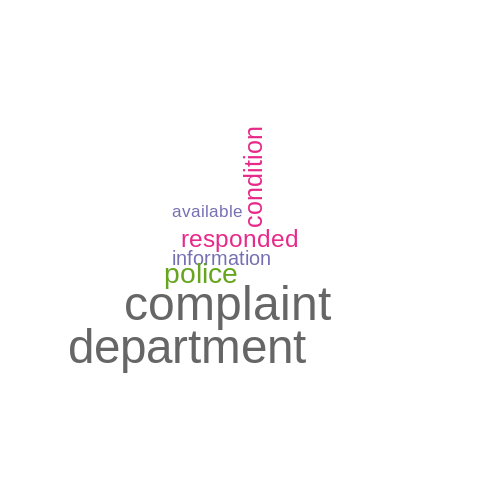

In [ ]:
%%R
tdm_cloud <- as.matrix(tdm_unsprsd)
v <- sort(rowSums(tdm_cloud),decreasing=TRUE)
d <- data.frame(word=names(v),freq=v)   
wordcloud(d$word,d$freq,max.words=50, min.freq=5, colors=brewer.pal(8, 'Dark2'))

In [ ]:
%%R

library(tidytext)

data(stop_words)

tokenized_resolutions <- dataset %>%
  select(Complaint.Type, Descriptor, Street.Name, City, Resolution.Description, Borough, Open.Data.Channel.Type) %>%
  filter(!str_detect(Borough, "Unspecified")) %>% 
  filter(!str_detect(Resolution.Description,"NA")) %>% 
  unnest_tokens(word, Resolution.Description) %>%
  anti_join(stop_words) %>%
  group_by(Borough, word) %>%
  tally()

From cffi callback <function _processevents at 0x7f0cbc8e4a70>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f0cbc8e4a70>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt
From cffi callback <function _processevents at 0x7f0cbc8e4a70>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


Joining, by = "word"


In [ ]:
%%R
tokenized_resolutions %>% glimpse()

Rows: 5,114
Columns: 3
Groups: Borough [5]
$ Borough <chr> "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX",…
$ word    <chr> "00", "1", "10", "10010", "1040", "1046", "120", "14", "15", "…
$ n       <int> 5, 819, 124, 6, 3, 155, 224, 577, 613, 1576, 4, 21, 951, 1576,…


In [ ]:
%%R
str(tokenized_resolutions)

grouped_df [5,114 × 3] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Borough: chr [1:5114] "BRONX" "BRONX" "BRONX" "BRONX" ...
 $ word   : chr [1:5114] "00" "1" "10" "10010" ...
 $ n      : int [1:5114] 5 819 124 6 3 155 224 577 613 1576 ...
 - attr(*, "groups")= tibble [5 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ Borough: chr [1:5] "BRONX" "BROOKLYN" "MANHATTAN" "QUEENS" ...
  ..$ .rows  : list<int> [1:5] 
  .. ..$ : int [1:1001] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ : int [1:1071] 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 ...
  .. ..$ : int [1:1022] 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 ...
  .. ..$ : int [1:1068] 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 ...
  .. ..$ : int [1:952] 4163 4164 4165 4166 4167 4168 4169 4170 4171 4172 ...
  .. ..@ ptype: int(0) 
  ..- attr(*, ".drop")= logi TRUE


Selecting by n


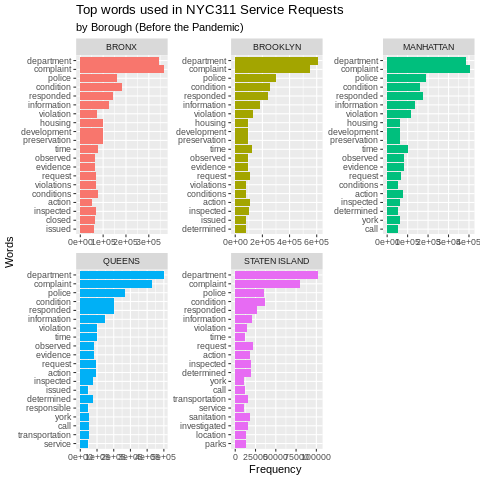

In [ ]:
%%R
tokenized_resolutions %>%
  group_by(Borough) %>%
  top_n(20) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(word,n), y = n, fill = factor(Borough))) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none") +
  facet_wrap(~Borough, scales = "free") + 
  coord_flip() +
  labs(x = "Words", y = "Frequency", title = "Top words used in NYC311 Service Requests",
       subtitle = "by Borough (Before the Pandemic)")

Selecting by tf_idf


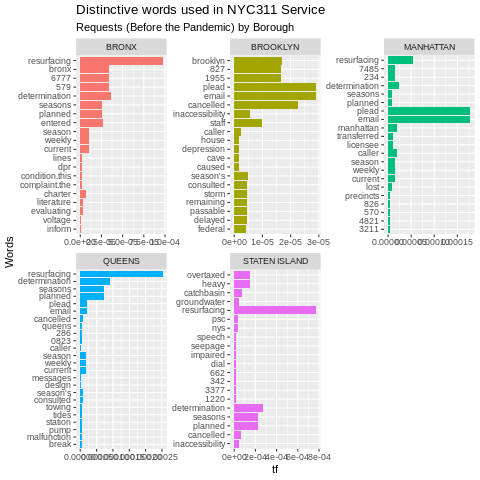

In [ ]:
%%R

tf_idf_words <- tokenized_resolutions %>%
  bind_tf_idf(word, Borough, n) %>%
  arrange(desc(tf_idf))

tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf)) %>%
  ggplot(aes(x = reorder(word, tf_idf), y = tf, fill = Borough)) +
  geom_col() +
  labs(x = "Words", y = "tf",
       title = "Distinctive words used in NYC311 Service ",
       subtitle = "Requests (Before the Pandemic) by Borough") +
  coord_flip() +
  theme(legend.position = "none") +
  facet_wrap(~ Borough, scales = "free")

In [ ]:
%%R

library(tidytext)

data(stop_words)

tokenized_resolutions <- dataset %>%
  select(Complaint.Type, Descriptor, Street.Name, City, Resolution.Description, Borough, Open.Data.Channel.Type) %>%
  filter(!str_detect(Borough, "Unspecified")) %>% 
  filter(!str_detect(Resolution.Description,"NA")) %>% 
  unnest_tokens(word, Descriptor) %>%
  anti_join(stop_words) %>%
  group_by(Borough, word) %>%
  tally()

Joining, by = "word"


In [ ]:
%%R
tokenized_resolutions %>% glimpse()

Rows: 5,940
Columns: 3
Groups: Borough [5]
$ Borough <chr> "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX",…
$ word    <chr> "1", "10", "10a", "12", "14", "14b", "15", "15i", "15n", "15r"…
$ n       <int> 1297, 135, 1, 348, 5805, 58, 1632, 20, 4, 2, 10, 3, 43, 33, 8,…


Selecting by n


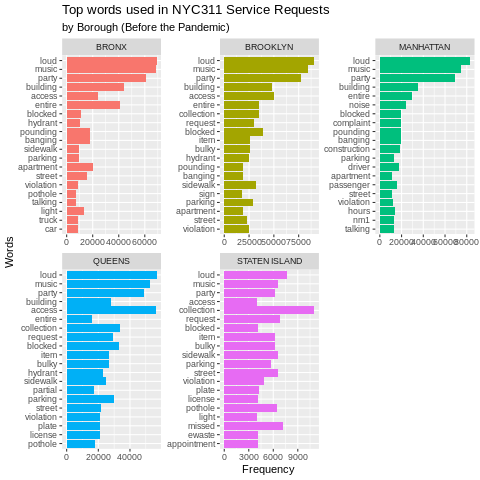

In [ ]:
%%R
tokenized_resolutions %>%
  group_by(Borough) %>%
  top_n(20) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(word,n), y = n, fill = factor(Borough))) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none") +
  facet_wrap(~Borough, scales = "free") + 
  coord_flip() +
  labs(x = "Words", y = "Frequency", title = "Top words used in NYC311 Service Requests",
       subtitle = "by Borough (Before the Pandemic)")

Selecting by tf_idf


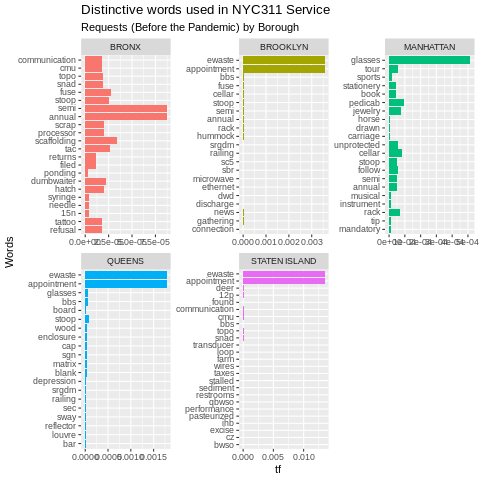

In [ ]:
%%R

tf_idf_words <- tokenized_resolutions %>%
  bind_tf_idf(word, Borough, n) %>%
  arrange(desc(tf_idf))

tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf)) %>%
  ggplot(aes(x = reorder(word, tf_idf), y = tf, fill = Borough)) +
  geom_col() +
  labs(x = "Words", y = "tf",
       title = "Distinctive words used in NYC311 Service ",
       subtitle = "Requests (Before the Pandemic) by Borough") +
  coord_flip() +
  theme(legend.position = "none") +
  facet_wrap(~ Borough, scales = "free")

In [ ]:
%%R
options(tibble.print_max = Inf)
tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf), by_group = Borough)

Selecting by tf_idf
# A tibble: 109 x 6
# Groups:   Borough [5]
    Borough       word              n         tf   idf     tf_idf
    <chr>         <chr>         <int>      <dbl> <dbl>      <dbl>
  1 STATEN ISLAND appointment    4124 0.0135     0.511 0.00687   
  2 STATEN ISLAND ewaste         4124 0.0135     0.511 0.00687   
  3 BROOKLYN      appointment    6172 0.00356    0.511 0.00182   
  4 BROOKLYN      ewaste         6172 0.00356    0.511 0.00182   
  5 QUEENS        appointment    2533 0.00178    0.511 0.000912  
  6 QUEENS        ewaste         2533 0.00178    0.511 0.000912  
  7 MANHATTAN     glasses         579 0.000516   0.223 0.000115  
  8 STATEN ISLAND 12p              18 0.0000587  1.61  0.0000945 
  9 STATEN ISLAND deer             18 0.0000587  1.61  0.0000945 
 10 STATEN ISLAND cmu              63 0.000206   0.223 0.0000459 
 11 STATEN ISLAND communication    63 0.000206   0.223 0.0000459 
 12 STATEN ISLAND found            10 0.0000326  0.916 0.0000299 
 13 MANHATTA

### During The Pandemic

In [ ]:
%%R
dataset <- read.csv('drive/My Drive/covid311.csv')

In [ ]:
%%R
dataset_filt <- subset(dataset, Complaint.Type %in% count(dataset, Complaint.Type, sort=T)[1:50,]$Complaint.Type)
sr_resolution <- dataset_filt$Resolution.Description

In [ ]:
%%R
sr_resolution_cln <- sr_resolution %>% iconv("latin1", "ASCII")
control <- list(stopwords=TRUE, removePunctuation=TRUE, removeNumbers=TRUE, minDocFreq = 5)

In [ ]:
%%R
corpus <- VCorpus(VectorSource(sr_resolution_cln))
tdm <- TermDocumentMatrix(corpus, control)
tdm

<<TermDocumentMatrix (terms: 921, documents: 2497525)>>
Non-/sparse entries: 25256369/2274964156
Sparsity           : 99%
Maximal term length: 45
Weighting          : term frequency (tf)


In [ ]:
%%R
tdm_unsprsd <- removeSparseTerms(tdm, 0.8)
tdm_unsprsd

<<TermDocumentMatrix (terms: 8, documents: 2497525)>>
Non-/sparse entries: 9010366/10969834
Sparsity           : 55%
Maximal term length: 11
Weighting          : term frequency (tf)


In [ ]:
%%R
length(findFreqTerms(tdm_unsprsd,50))

[1] 8


In [ ]:
%%R
topterms <- findFreqTerms(tdm_unsprsd,50)
topterms

[1] "action"      "available"   "complaint"   "condition"   "department" 
[6] "information" "police"      "responded"  


In [ ]:
%%R
topterms <- topterms[!is.na(topterms)]
assoc <- findAssocs(tdm_unsprsd, topterms[1:5], 0.4) 
lapply(assoc, function(x) kable(x))

$action


|          |    x|
|:---------|----:|
|police    | 0.61|
|responded | 0.55|

$available


|            |    x|
|:-----------|----:|
|information | 0.73|

$complaint


|  x|
|--:|

$condition


|  x|
|--:|

$department


|  x|
|--:|



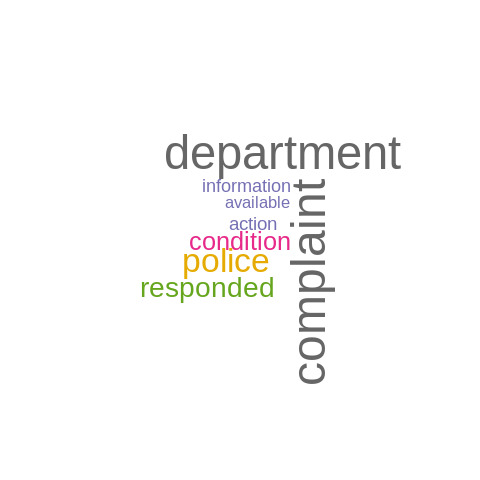

In [ ]:
%%R
tdm_cloud <- as.matrix(tdm_unsprsd)
v <- sort(rowSums(tdm_cloud),decreasing=TRUE)
d <- data.frame(word=names(v),freq=v)   
wordcloud(d$word,d$freq,max.words=50, min.freq=5, colors=brewer.pal(8, 'Dark2'))

In [ ]:
%%R

library(tidytext)

data(stop_words)

tokenized_resolutions <- dataset %>%
  select(Complaint.Type, Descriptor, Street.Name, City, Resolution.Description, Borough, Open.Data.Channel.Type) %>%
  filter(!str_detect(Borough, "Unspecified")) %>% 
  filter(!str_detect(Resolution.Description,"NA")) %>% 
  unnest_tokens(word, Resolution.Description) %>%
  anti_join(stop_words) %>%
  group_by(Borough, word) %>%
  tally()

Joining, by = "word"


In [ ]:
%%R
tokenized_resolutions %>% glimpse()

Rows: 4,841
Columns: 3
Groups: Borough [5]
$ Borough <chr> "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX",…
$ word    <chr> "1", "10", "10010", "1040", "1046", "120", "14", "15", "152", …
$ n       <int> 381, 62, 7, 3, 44, 231, 147, 1102, 586, 341, 586, 53, 1088, 13…


In [ ]:
%%R
str(tokenized_resolutions)

grouped_df [4,841 × 3] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ Borough: chr [1:4841] "BRONX" "BRONX" "BRONX" "BRONX" ...
 $ word   : chr [1:4841] "1" "10" "10010" "1040" ...
 $ n      : int [1:4841] 381 62 7 3 44 231 147 1102 586 341 ...
 - attr(*, "groups")= tibble [5 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ Borough: chr [1:5] "BRONX" "BROOKLYN" "MANHATTAN" "QUEENS" ...
  ..$ .rows  : list<int> [1:5] 
  .. ..$ : int [1:962] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ : int [1:1001] 963 964 965 966 967 968 969 970 971 972 ...
  .. ..$ : int [1:992] 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 ...
  .. ..$ : int [1:985] 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 ...
  .. ..$ : int [1:901] 3941 3942 3943 3944 3945 3946 3947 3948 3949 3950 ...
  .. ..@ ptype: int(0) 
  ..- attr(*, ".drop")= logi TRUE


Selecting by n


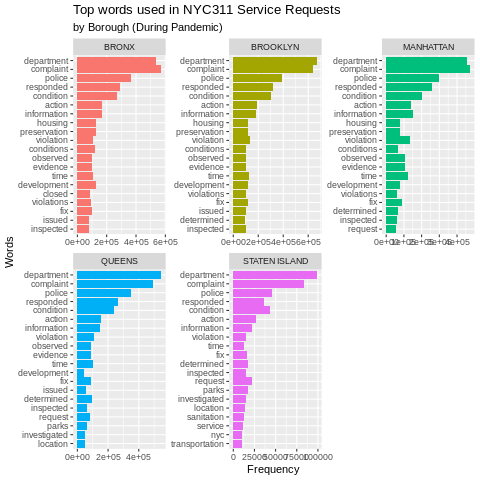

In [ ]:
%%R
tokenized_resolutions %>%
  group_by(Borough) %>%
  top_n(20) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(word,n), y = n, fill = factor(Borough))) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none") +
  facet_wrap(~Borough, scales = "free") + 
  coord_flip() +
  labs(x = "Words", y = "Frequency", title = "Top words used in NYC311 Service Requests",
       subtitle = "by Borough (During the Pandemic)")

Selecting by tf_idf


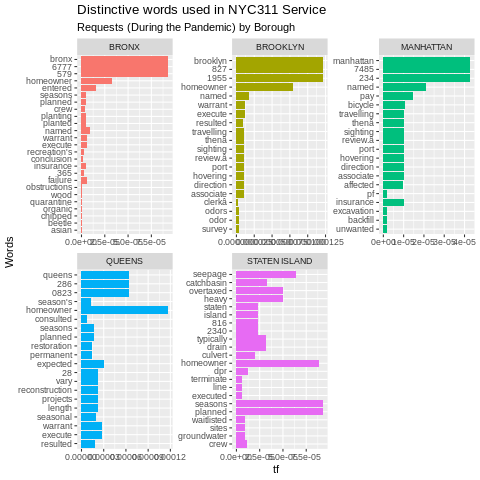

In [ ]:
%%R

tf_idf_words <- tokenized_resolutions %>%
  bind_tf_idf(word, Borough, n) %>%
  arrange(desc(tf_idf))

tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf)) %>%
  ggplot(aes(x = reorder(word, tf_idf), y = tf, fill = Borough)) +
  geom_col() +
  labs(x = "Words", y = "tf",
       title = "Distinctive words used in NYC311 Service ",
       subtitle = "Requests (During the Pandemic) by Borough") +
  coord_flip() +
  theme(legend.position = "none") +
  facet_wrap(~ Borough, scales = "free")

In [ ]:
%%R

library(tidytext)

data(stop_words)

tokenized_resolutions <- dataset %>%
  select(Complaint.Type, Descriptor, Street.Name, City, Resolution.Description, Borough, Open.Data.Channel.Type) %>%
  filter(!str_detect(Borough, "Unspecified")) %>% 
  filter(!str_detect(Resolution.Description,"NA")) %>% 
  unnest_tokens(word, Descriptor) %>%
  anti_join(stop_words) %>%
  group_by(Borough, word) %>%
  tally()

Joining, by = "word"


In [ ]:
%%R
tokenized_resolutions %>% glimpse()

Rows: 5,126
Columns: 3
Groups: Borough [5]
$ Borough <chr> "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX", "BRONX",…
$ word    <chr> "1", "10", "14", "14b", "15", "15i", "15n", "15s", "15x", "16"…
$ n       <int> 1360, 1, 4186, 106, 433, 17, 9, 320, 5, 2, 63, 35, 338, 197, 2…


Selecting by n


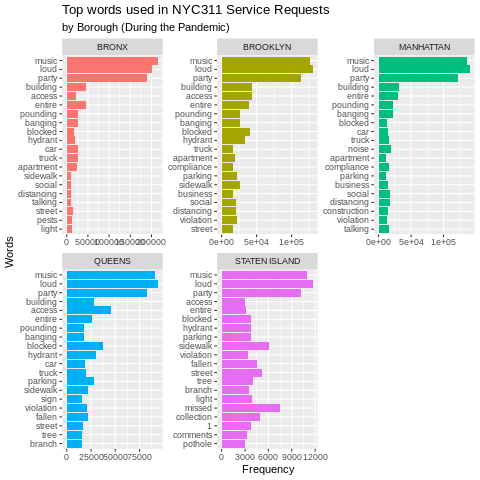

In [ ]:
%%R
tokenized_resolutions %>%
  group_by(Borough) %>%
  top_n(20) %>%
  arrange(desc(n)) %>%
  ggplot(aes(x = reorder(word,n), y = n, fill = factor(Borough))) +
  geom_bar(stat = "identity") +
  theme(legend.position = "none") +
  facet_wrap(~Borough, scales = "free") + 
  coord_flip() +
  labs(x = "Words", y = "Frequency", title = "Top words used in NYC311 Service Requests",
       subtitle = "by Borough (During the Pandemic)")

Selecting by tf_idf


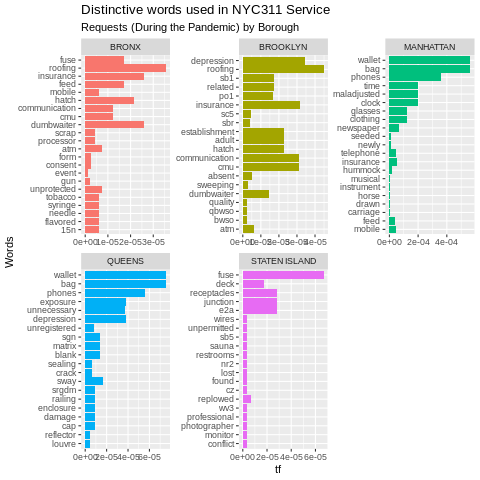

In [ ]:
%%R

tf_idf_words <- tokenized_resolutions %>%
  bind_tf_idf(word, Borough, n) %>%
  arrange(desc(tf_idf))

tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf)) %>%
  ggplot(aes(x = reorder(word, tf_idf), y = tf, fill = Borough)) +
  geom_col() +
  labs(x = "Words", y = "tf",
       title = "Distinctive words used in NYC311 Service ",
       subtitle = "Requests (During the Pandemic) by Borough") +
  coord_flip() +
  theme(legend.position = "none") +
  facet_wrap(~ Borough, scales = "free")

In [ ]:
%%R
options(tibble.print_max = Inf)
tf_idf_words %>% 
  top_n(20) %>%
  arrange(desc(tf_idf), by_group = Borough)

Selecting by tf_idf
# A tibble: 103 x 6
# Groups:   Borough [5]
    Borough       word              n         tf   idf     tf_idf
    <chr>         <chr>         <int>      <dbl> <dbl>      <dbl>
  1 MANHATTAN     bag             690 0.000565   0.223 0.000126  
  2 MANHATTAN     wallet          690 0.000565   0.223 0.000126  
  3 MANHATTAN     phones          438 0.000358   0.223 0.0000800 
  4 MANHATTAN     clock           241 0.000197   0.223 0.0000440 
  5 MANHATTAN     maladjusted     241 0.000197   0.223 0.0000440 
  6 MANHATTAN     time            241 0.000197   0.223 0.0000440 
  7 QUEENS        depression       56 0.0000382  0.916 0.0000350 
  8 QUEENS        exposure         56 0.0000382  0.916 0.0000350 
  9 QUEENS        unnecessary      55 0.0000375  0.916 0.0000344 
 10 BROOKLYN      depression       60 0.0000345  0.916 0.0000317 
 11 MANHATTAN     clothing        154 0.000126   0.223 0.0000281 
 12 MANHATTAN     glasses         154 0.000126   0.223 0.0000281 
 13 QUEENS  

## Clustering Type of Complaints per ZipCode

In [ ]:
%%R

install.packages(c('dplyr', 'plyr'))
library(plyr)
library(dplyr)

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 949019 bytes (926 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
install.packages(c('tidyr', 'psych', 'reshape2', 'ggplot2'))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyr_1.1.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 707909 bytes (691 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R

dataset$Complaint.Type = tolower(dataset$Complaint.Type) 
dataset$Complaint.Type = gsub('s$', '', dataset$Complaint.Type) 
dataset$Incident.Zip = gsub('-[[:digit:]]{4}$', '', dataset$Incident.Zip)
dataset$Complaint.Type = gsub('paint - plaster', 'paint/plaster', dataset$Complaint.Type)
dataset$Complaint.Type = gsub('general construction', 'construction', dataset$Complaint.Type)
dataset$Complaint.Type = gsub('nonconst', 'construction', dataset$Complaint.Type)
dataset$Complaint.Type = gsub('street sign - [[:alpha:]]+', 'street sign', dataset$Complaint.Type)
dataset$Complaint.Type = gsub('fire alarm - .+','fire alarm', dataset$Complaint.Type)
idx = grepl('[[:digit:]]{5}', dataset$Incident.Zip)

clean = dataset[idx,]

datasetbyZip = ddply(clean, .(Incident.Zip, Complaint.Type), count)

In [ ]:
%%R

library(tidyr)
library(psych)
library(reshape2)
library(ggplot2)

raw = spread(datasetbyZip, Complaint.Type, n)
raw[is.na(raw)] = 0
counts = which(colSums(raw[,-1]) < 10)
zipcodes = raw[,1]
raw = raw[,-1]
raw = raw[,-counts]
processed = scale(raw, center=T, scale=T)

### Gaussian Mixtures

In [ ]:
%%R
install.packages(c("mclust", 'factoextra'))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.58.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 195698 bytes (191 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [ ]:
%%R
library("mclust")
set.seed(1312)
mc <- Mclust(processed)
summary(mc)        

R[write to console]:     __  ___________    __  _____________
   /  |/  / ____/ /   / / / / ___/_  __/
  / /|_/ / /   / /   / / / /\__ \ / /   
 / /  / / /___/ /___/ /_/ /___/ // /    
/_/  /_/\____/_____/\____//____//_/    version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

R[write to console]: 
Attaching package: ‘mclust’


R[write to console]: The following object is masked from ‘package:psych’:

    sim




fitting ...
  |======================================================================| 100%
---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 4 components: 

 log-likelihood   n  df       BIC       ICL
      -13068.78 235 746 -30210.41 -30210.41

Clustering table:
  1   2   3   4 
178  14  24  19 


R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



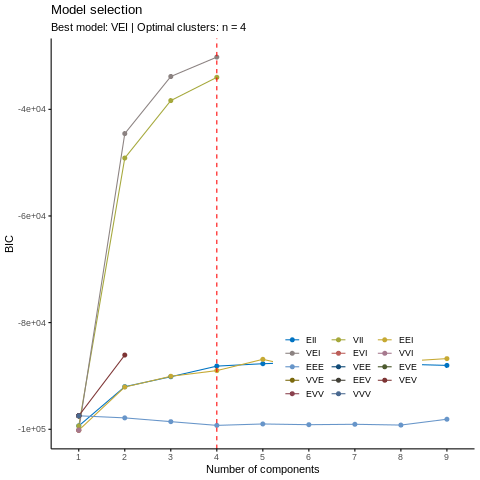

In [ ]:
%%R
library(factoextra)
fviz_mclust(mc, "BIC", palette = "jco")

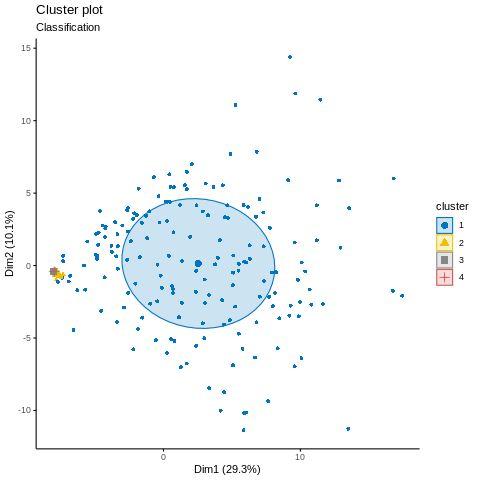

In [ ]:
%%R
fviz_mclust(mc, "classification", geom = "point", pointsize = 1.5, palette = "jco")

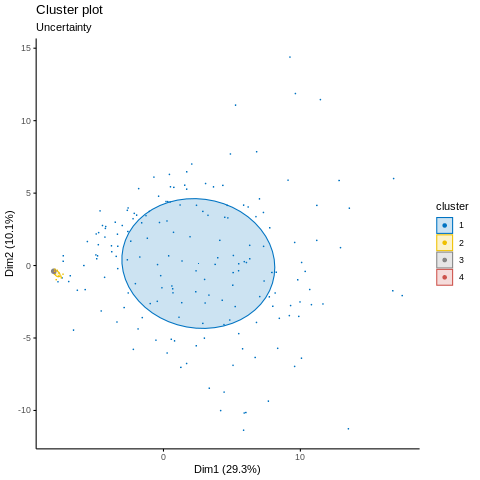

In [ ]:
%%R
fviz_mclust(mc, "uncertainty", palette = "jco")

### DBSCAN

In [ ]:
%%R
install.packages('dbscan')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dbscan_1.1-6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2456088 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

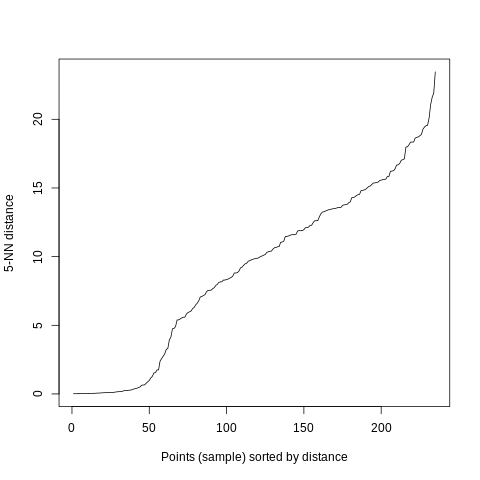

In [ ]:
%%R
library(dbscan)

kNNdistplot(processed, k =  5)

In [ ]:
%%R
set.seed(1312)
db <- dbscan(processed, eps = 3)
db

DBSCAN clustering for 235 objects.
Parameters: eps = 3, minPts = 5
The clustering contains 1 cluster(s) and 175 noise points.

  0   1 
175  60 

Available fields: cluster, eps, minPts


### k-Means

Clustering k = 1,2,..., K.max (= 10): .. done
Bootstrapping, b = 1,2,..., B (= 500)  [one "." per sample]:
..

From cffi callback <function _processevents at 0x7fb30748b830>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


................................................ 50 
.................................................. 100 
.................................................. 150 
.................................................. 200 
.................................................. 250 
.................................................. 300 
.................................................. 350 
.................................................. 400 
.................................................. 450 
.................................................. 500 


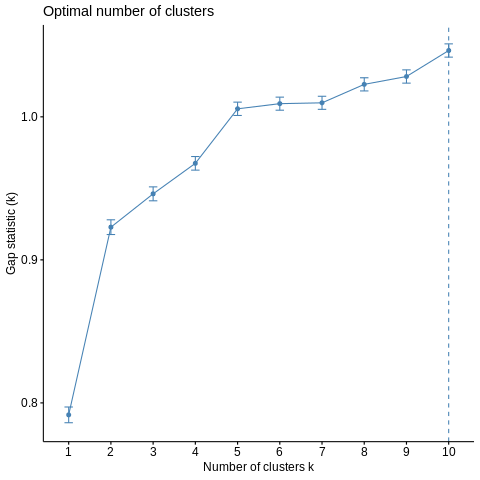

In [ ]:
%%R

set.seed(1312)

gapst <- clusGap(processed, FUN = kmeans, nstart = 25, K.max = 10, B = 500)
fviz_gap_stat(gapst)

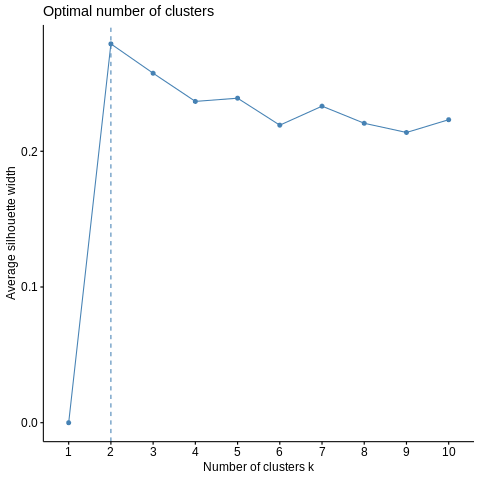

In [ ]:
%%R
fviz_nbclust(processed, FUN = kmeans, method = "silhouette")

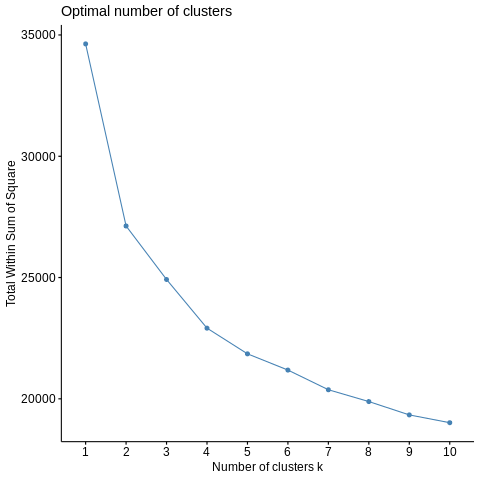

In [ ]:
%%R
fviz_nbclust(processed, FUN = kmeans, method = "wss")

In [ ]:
%%R
cluster <- kmeans(processed, 5)
cluster

K-means clustering with 5 clusters of sizes 17, 92, 31, 33, 62

Cluster means:
  abandoned vehicle air quality animal facility - no permit animal in a park
1         1.4896553  0.80050614                  0.92521723        0.3259661
2        -0.5899924 -0.75564402                 -0.26373236       -0.3926393
3         0.1136568  0.43609002                  0.00938565        0.1651794
4        -0.4205463  1.25238446                  0.11029672        0.9694835
5         0.6340295  0.01714787                  0.07425705       -0.1053568
  animal-abuse  appliance     asbesto beach/pool/sauna complaint
1    1.1017611  0.1063219  0.53740151                 1.01580247
2   -0.8314483 -0.5485119 -0.69232971                -0.26322056
3    1.2620914  2.0333112  0.83066106                -0.22087636
4    0.1382672 -0.1820034  1.04435775                 0.05611363
5    0.2270266 -0.1350148 -0.09122244                 0.19263012
  best/site safety bike rack condition bike/roller/skate chronic
1   

### HRC

In [ ]:
%%R
library(tidyverse)

dis<-get_dist(processed,'euclidean')

m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

ac <- function(x) agnes(processed, method = x)$ac

print(map_dbl(m, ac))


hc1<-hclust(dis, method = "complete")
hc2<-hclust(dis, method = "single")
hc3<-hclust(dis, method = "average")
hc4<-hclust(dis, method = "ward.D")

  average    single  complete      ward 
0.6684867 0.6106815 0.7381690 0.9214481 


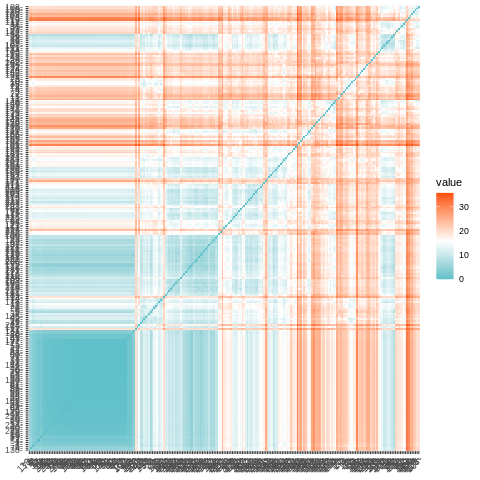

In [ ]:
%%R
fviz_dist(dis, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

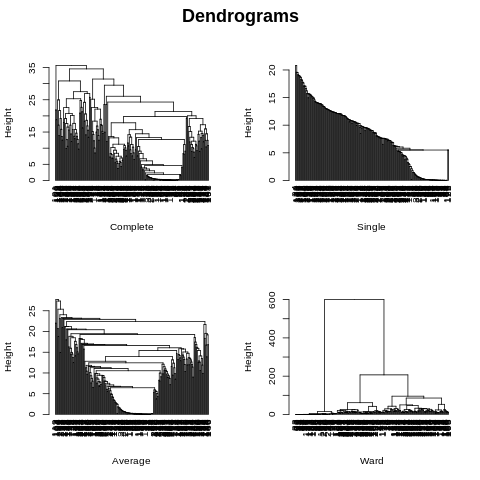

In [ ]:
%%R

par(mfrow=c(2,2),oma=c(0,0,1,0))
plot(as.dendrogram(hc1), cex=0.6, xlab= 'Complete', main=NULL,ylab='Height')
plot(as.dendrogram(hc2), cex=0.6, xlab= 'Single',main=NULL,ylab='Height')
plot(as.dendrogram(hc3), cex=0.6, xlab= 'Average',main=NULL,ylab='Height')
plot(as.dendrogram(hc4), cex=0.6, xlab= 'Ward',main=NULL,ylab='Height')
mtext('Dendrograms', side=3, line=-1, outer=TRUE, cex=1.5, font=2)
par(mfrow=c(1,1))

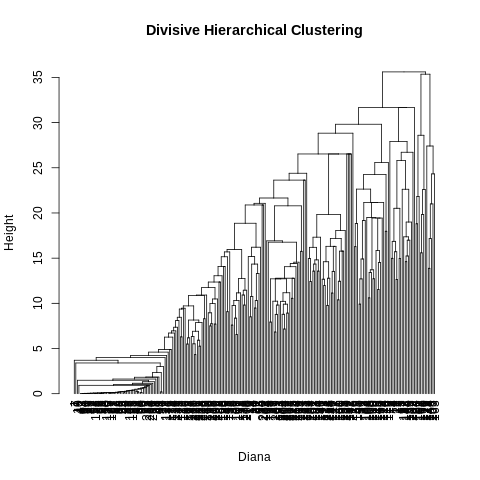

In [ ]:
%%R
hc5<-diana(processed)
hc5$dc
plot(as.dendrogram(hc5), cex=0.6, xlab= 'Diana',main='Divisive Hierarchical Clustering',ylab='Height')

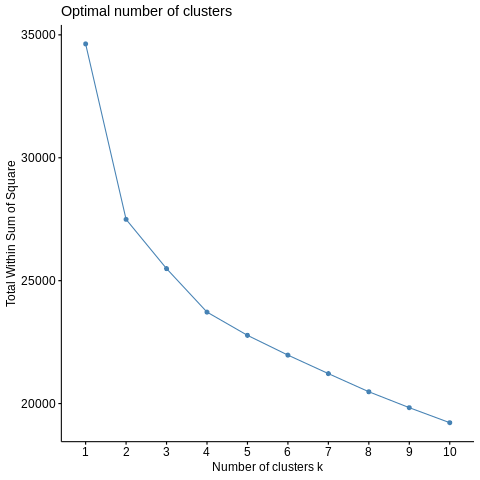

In [ ]:
%%R
fviz_nbclust(processed, FUN = hcut, method = "wss")

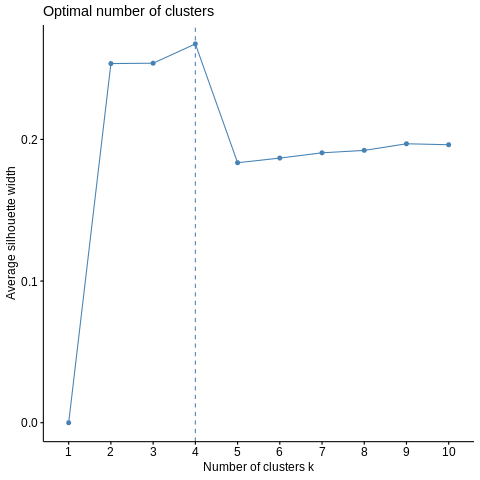

In [ ]:
%%R
fviz_nbclust(processed, FUN = hcut, method = "silhouette")

Clustering k = 1,2,..., K.max (= 10): .. done
Bootstrapping, b = 1,2,..., B (= 500)  [one "." per sample]:
.................................................. 50 
.................................................. 100 
.................................................. 150 
.................................................. 200 
.................................................. 250 
.................................................. 300 
.................................................. 350 
.................................................. 400 
.................................................. 450 
.................................................. 500 


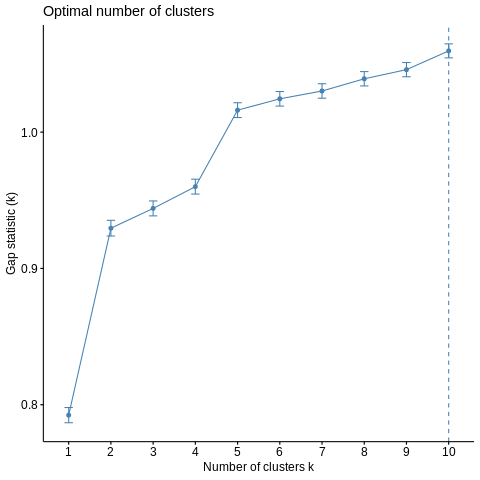

In [ ]:
%%R
gap_stat <- clusGap(processed, FUN = hcut, nstart = 25, K.max = 10, B = 500)
fviz_gap_stat(gap_stat)

In [ ]:
%%R
hcc1<-cutree(hc1,4)
hcc2<-cutree(hc2,4)
hcc3<-cutree(hc3,4)
hcc4<-cutree(hc4,4)
hcc5<-cutree(hc5,4)
print(table(hcc1))
print(table(hcc2))
print(table(hcc3))
print(table(hcc4)) 
print(table(hcc5))

hcc1
  1   2   3   4 
161  20  51   3 
hcc2
  1   2   3   4 
232   1   1   1 
hcc3
  1   2   3   4 
229   1   3   2 
hcc4
 1  2  3  4 
64 26 69 76 
hcc5
  1   2   3   4 
205  17   7   6 


  cluster size ave.sil.width
1       1   64          0.88
2       2   26          0.00
3       3   69         -0.13
4       4   76         -0.08


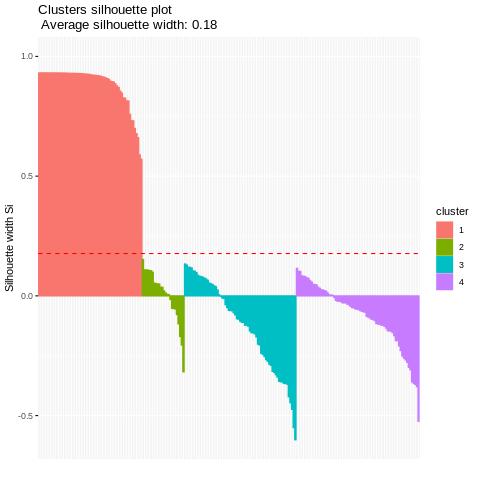

In [ ]:
%%R
sil_hcc4<-silhouette(hcc4, dis)
sils_hcc4<-summary(sil_hcc4)
fviz_silhouette(sil_hcc4)

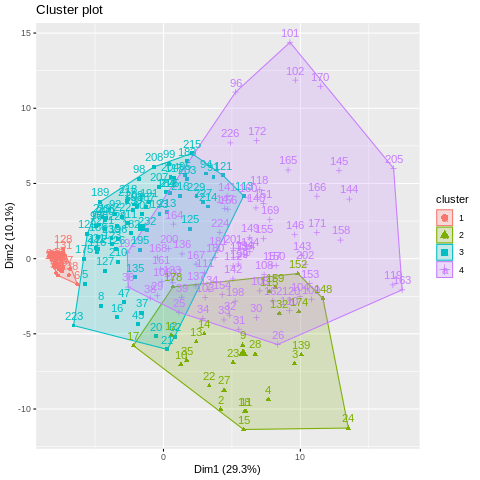

In [ ]:
%%R
fviz_cluster(list(data = processed, cluster = hcc4))

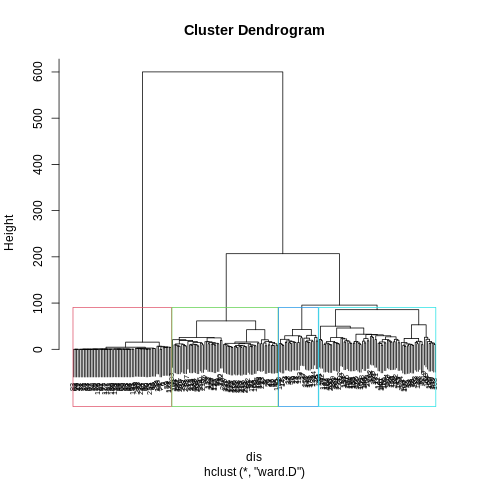

In [ ]:
%%R
plot(hc4, cex = 0.6)
rect.hclust(hc4, k = 4, border = 2:5)

## Map for k-means

In [ ]:
%%R

install.packages(c('maptools', 'RColorBrewer'))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/maptools_1.0-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1585377 bytes (1.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [ ]:
%%R

library(maptools)
library(RColorBrewer)

nyc_data <-readShapeSpatial("drive/My Drive/ZIP_CODE_040114")

zipcolor = data.frame(zip = nyc_data$ZIPCODE, color = NA)
for(i in 1:nrow(zipcolor)){
  if(zipcolor[i,1] %in% zipcodes){
    zipcolor[i,2] = cluster$cluster[which(zipcodes == zipcolor[i,1])]
  }
}
zipcolor$clusters = ifelse(zipcolor$color == 'NA', NA, paste0('Cluster ', zipcolor$color))

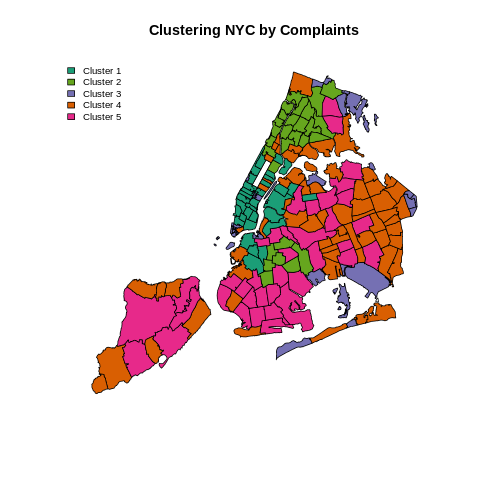

In [ ]:
%%R

colors = brewer.pal(5, 'Dark2')
plot(nyc_data, col=colors[zipcolor$color], main = 'Clustering NYC by Complaints')
legend('topleft', legend=names(table(zipcolor$clusters)), fill = names(table(colors[zipcolor$color])), cex = 0.8, bty = "n")